# Data augmentation with Albumentations

To avoid overfitting, it is a good idea to apply some basic data augmentation transforms. For this, we will use [**Albumentations**](https://github.com/albumentations-team/albumentations), a fast augmentation library that is compatible with detection and segmentation tasks. For more details, check out the [Albumentations documentation](https://albumentations.ai/docs/).

In [1]:
import albumentations as A
from lib.camvid import CamVid


transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0,
                       shift_limit=0.1, p=1, border_mode=0),
    A.PadIfNeeded(min_height=320, min_width=320,
                  always_apply=True, border_mode=0),
    A.RandomCrop(height=320, width=320, always_apply=True),
])

augmented_dataset = CamVid(
    './data/CamVid/',
    'train',
    augmentation=transform,
    classes=['car'],
)

We apply this transform pipeline a couple of times to the same image. Note how each time, the outcome is clearly different. Also note how the mask gets transformed along.

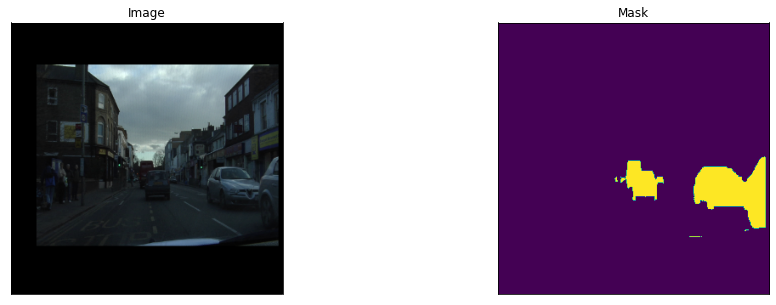

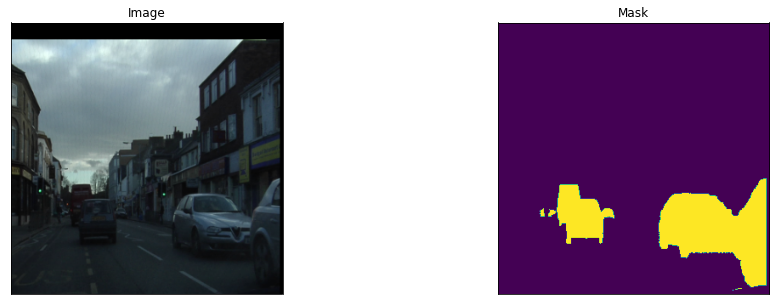

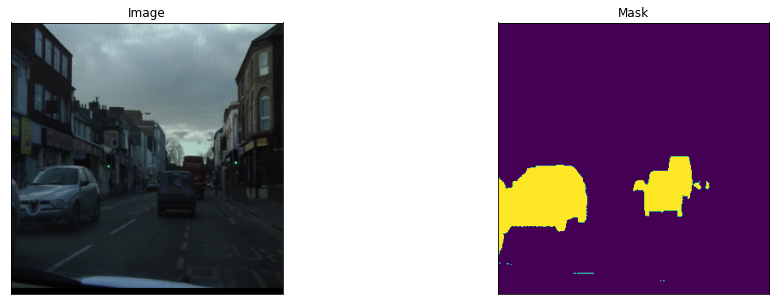

In [2]:
from random import randint
from lib.plot import visualize


idx = randint(0, len(augmented_dataset) - 1)

# same image with different random transforms
for i in range(3):
    image, mask = augmented_dataset[idx]
    visualize(image=image, mask=mask.squeeze(-1))